In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


In [3]:
import requests
from citipy import citipy

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Replace 'YOUR_API_KEY_HERE' with your actual OpenWeatherMap API key
api_key = "53936d68d19b3f979a5386b70910c08f"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1  # Reset the record count

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"  # Use metric units
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    try:
        # Make the API request
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out data from the JSON response
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
        
        # Increment the record count
        record_count += 1

    except Exception as e:
        print(f"City not found. Skipping...{e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | haibara-akanedai
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | vastervik
City not found. Skipping...'coord'
Processing Record 6 of Set 1 | ixtapa
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | mwene-ditu
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | tromso
Processing Record 11 of Set 1 | imbituba
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | afaahiti
Processing Record 14 of Set 1 | baiyin
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | praia da vitoria
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | fuvahmu

Processing Record 27 of Set 4 | carnarvon
Processing Record 28 of Set 4 | xai-xai
Processing Record 29 of Set 4 | wailua homesteads
Processing Record 30 of Set 4 | muisne
Processing Record 31 of Set 4 | atafu village
Processing Record 32 of Set 4 | olonkinbyen
Processing Record 33 of Set 4 | acarau
Processing Record 34 of Set 4 | igarka
Processing Record 35 of Set 4 | zhezqazghan
Processing Record 36 of Set 4 | quelimane
Processing Record 37 of Set 4 | ironwood
Processing Record 38 of Set 4 | altai
Processing Record 39 of Set 4 | mogocha
Processing Record 40 of Set 4 | minas de marcona
Processing Record 41 of Set 4 | turpan
Processing Record 42 of Set 4 | estevan
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | argo
Processing Record 45 of Set 4 | port hedland
Processing Record 46 of Set 4 | antsiranana
Processing Record 47 of Set 4 | antsohihy
Processing Record 48 of Set 4 | porto novo
Processing Record 1 of Set 5 | solleftea
Processing Record 2 of Set 5 | lo

Processing Record 19 of Set 8 | mahdia
Processing Record 20 of Set 8 | angleton
Processing Record 21 of Set 8 | ola
Processing Record 22 of Set 8 | ina
Processing Record 23 of Set 8 | uvinza
Processing Record 24 of Set 8 | ras gharib
City not found. Skipping...'coord'
Processing Record 24 of Set 8 | slave lake
Processing Record 25 of Set 8 | constantia
Processing Record 26 of Set 8 | sitka
Processing Record 27 of Set 8 | mhamid
Processing Record 28 of Set 8 | cururupu
Processing Record 29 of Set 8 | shimoda
Processing Record 30 of Set 8 | namibe
Processing Record 31 of Set 8 | zyryanskoye
Processing Record 32 of Set 8 | gangtok
Processing Record 33 of Set 8 | yalutorovsk
Processing Record 34 of Set 8 | okha
Processing Record 35 of Set 8 | nova olinda do norte
Processing Record 36 of Set 8 | taunggyi
Processing Record 37 of Set 8 | nago
Processing Record 38 of Set 8 | gembu
Processing Record 39 of Set 8 | phu khuong
Processing Record 40 of Set 8 | fayroz koh
Processing Record 41 of Set 

Processing Record 10 of Set 12 | luena
Processing Record 11 of Set 12 | port augusta
Processing Record 12 of Set 12 | youghal
Processing Record 13 of Set 12 | pont rouge
Processing Record 14 of Set 12 | made
Processing Record 15 of Set 12 | khorugh
Processing Record 16 of Set 12 | rawson
Processing Record 17 of Set 12 | mount pearl
Processing Record 18 of Set 12 | omdurman
Processing Record 19 of Set 12 | cantaura
Processing Record 20 of Set 12 | yaren
Processing Record 21 of Set 12 | wewak
Processing Record 22 of Set 12 | tuyen quang
Processing Record 23 of Set 12 | borba
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,haibara-akanedai,34.5333,135.9500,31.81,52,3,3.08,JP,1691718838
1,saint-philippe,-21.3585,55.7679,19.77,78,1,2.15,RE,1691718685
2,waitangi,-43.9535,-176.5597,12.12,89,100,3.13,NZ,1691718644
3,whitehorse,60.7161,-135.0538,20.05,76,75,1.03,CA,1691718631
4,ilulissat,69.2167,-51.1000,7.01,81,75,1.54,GL,1691718651


In [44]:
import os

# Export the City_Data into a CSV file
output_folder = "output_data"

# Create the output_data folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Save the CSV file in the output_data folder
output_csv_file = os.path.join(output_folder, "city_data.csv")
city_data_df.to_csv(output_csv_file, index=False)


In [28]:
# Read saved data from the CSV file
loaded_data_df = pd.read_csv('city_weather_data.csv')

# Display the loaded data
loaded_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,20.03,91,42,1.44,US,1691717666
1,bardai,11.6500,7.2333,20.98,95,100,3.32,NG,1691718000
2,boende,-0.2167,20.8667,22.21,95,93,0.57,CD,1691718053
3,geraldton,-28.7667,114.6000,15.23,88,100,1.54,AU,1691717994
4,laguna,38.4210,-121.4238,33.38,38,0,5.14,US,1691718054


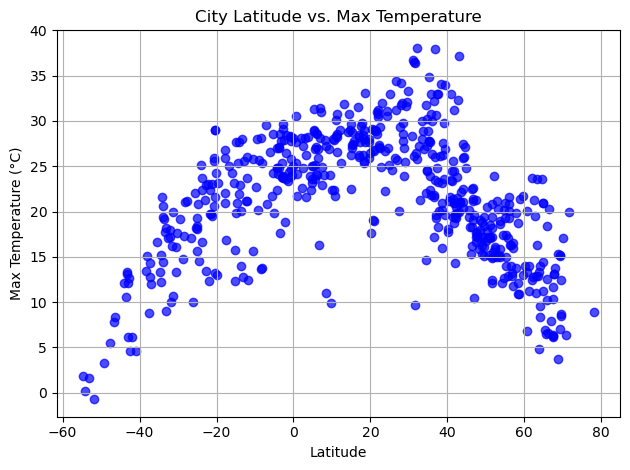

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig("latitude_vs_temperature.png")

# Display the plot
plt.show()

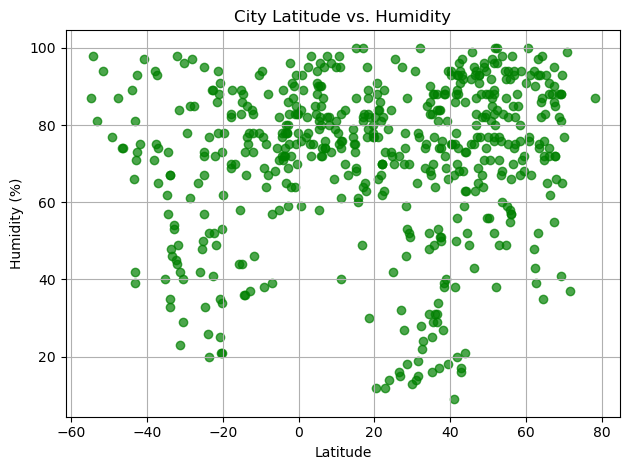

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="green", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig("latitude_vs_humidity.png")

# Display the plot
plt.show()

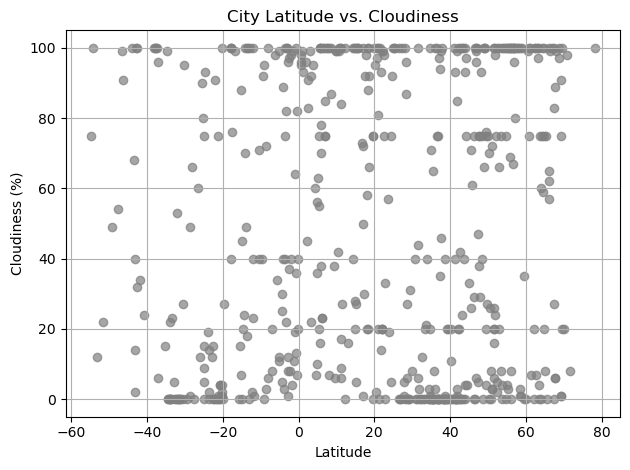

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="gray", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig("latitude_vs_cloudiness.png")

# Display the plot
plt.show()

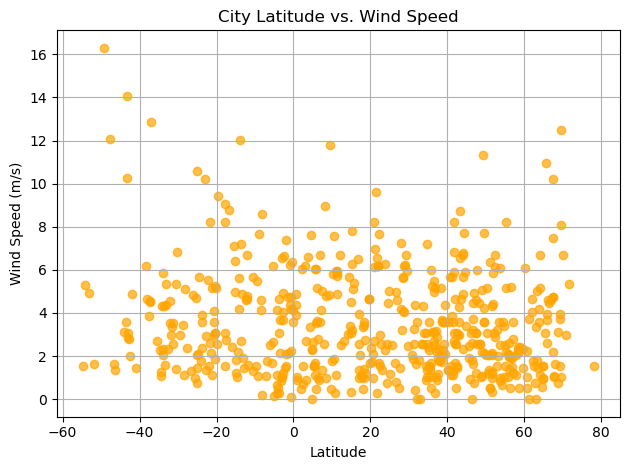

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="orange", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig("latitude_vs_wind_speed.png")

# Display the plot
plt.show()

In [33]:
# Create a DataFrame for Northern Hemisphere data
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display the Northern Hemisphere DataFrame
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,haibara-akanedai,34.5333,135.9500,31.81,52,3,3.08,JP,1691718838
3,whitehorse,60.7161,-135.0538,20.05,76,75,1.03,CA,1691718631
4,ilulissat,69.2167,-51.1000,7.01,81,75,1.54,GL,1691718651
5,ixtapa,20.7000,-105.2000,26.75,91,97,0.97,MX,1691718839
9,tromso,69.6496,18.9570,12.43,93,20,1.03,NO,1691718840


In [34]:
# Create a DataFrame for Southern Hemisphere data
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Display the Southern Hemisphere DataFrame
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,saint-philippe,-21.3585,55.7679,19.77,78,1,2.15,RE,1691718685
2,waitangi,-43.9535,-176.5597,12.12,89,100,3.13,NZ,1691718644
6,adamstown,-25.0660,-130.1015,18.45,57,15,10.57,PN,1691718643
7,mwene-ditu,-7.0000,23.4500,20.82,39,20,1.76,CD,1691718840
8,edinburgh of the seven seas,-37.0676,-12.3116,12.00,74,96,12.84,SH,1691718644


The r-value is: r = -0.68


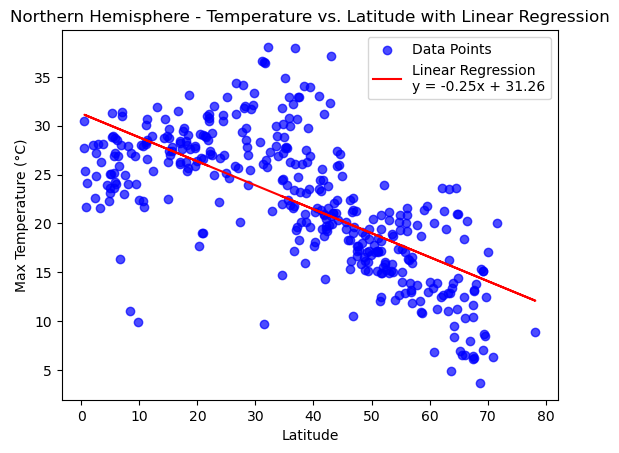

In [35]:
# Temperature vs. Latitude Linear Regression Plot
# Northern Hemisphere

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, filename=None):
    """
    Create a linear regression plot with regression equation and r value.

    Parameters:
        x_values (array-like): The x-axis values.
        y_values (array-like): The y-axis values.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        title (str): Title of the plot.
        filename (str): Filename for saving the plot as an image. Default is None.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    # Create scatter plot with linear regression line
    plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.7, label='Data Points')
    plt.plot(x_values, regression_line, color='red', label=f'Linear Regression\ny = {slope:.2f}x + {intercept:.2f}')
    
    # Set labels, title, and legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    # Add regression equation and r value to the plot
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_value_text = f'r = {r_value:.2f}'
    print(f"The r-value is: {r_value_text}")
    
    # Save the plot as an image 
    if filename:
        plt.savefig(filename)
    
    # Show the plot
    plt.show()
    
    # Temperature vs. Latitude in Northern Hemisphere
create_linear_regression_plot(
    northern_hemisphere_df["Lat"],
    northern_hemisphere_df["Max Temp"],
    "Latitude",
    "Max Temperature (°C)",
    "Northern Hemisphere - Temperature vs. Latitude with Linear Regression",
    "temperature_vs_latitude_regression.png"
)


The r-value is: r = 0.79


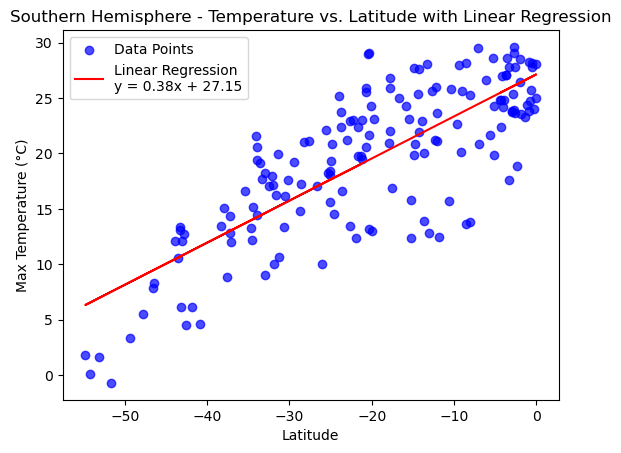

In [36]:
# Temperature vs. Latitude Linear Regression Plot
# Southern Hemisphere

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, filename=None):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.7, label='Data Points')
    plt.plot(x_values, regression_line, color='red', label=f'Linear Regression\ny = {slope:.2f}x + {intercept:.2f}')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    # Add regression equation and r value to the plot
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_value_text = f'r = {r_value:.2f}'
    print(f"The r-value is: {r_value_text}")
    
    if filename:
        plt.savefig(filename)
    
    plt.show()

# Example usage for Temperature vs. Latitude in Southern Hemisphere
create_linear_regression_plot(
    southern_hemisphere_df["Lat"],
    southern_hemisphere_df["Max Temp"],
    "Latitude",
    "Max Temperature (°C)",
    "Southern Hemisphere - Temperature vs. Latitude with Linear Regression",
    "southern_hemisphere_temperature_vs_latitude_regression.png"
)

**Discussion about the linear relationship:** 


The r-value is: r = 0.03


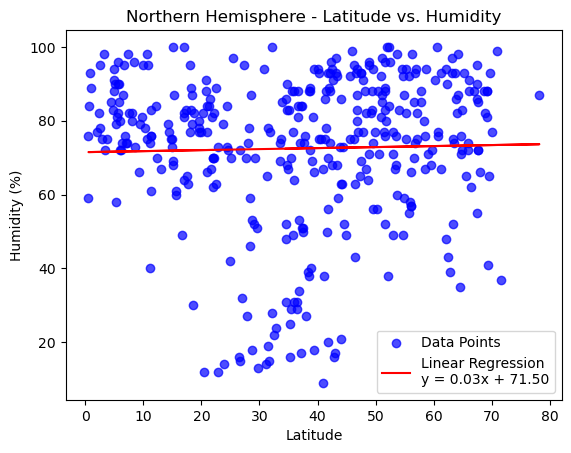

In [37]:
# Humidity vs. Latitude Linear Regression Plot
# Northern Hemisphere
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, filename=None):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.7, label='Data Points')
    plt.plot(x_values, regression_line, color='red', label=f'Linear Regression\ny = {slope:.2f}x + {intercept:.2f}')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    # Add regression equation and r value to the plot
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_value_text = f'r = {r_value:.2f}'
    print(f"The r-value is: {r_value_text}")
    
    if filename:
        plt.savefig(filename)
    
    plt.show()

create_linear_regression_plot(
    northern_hemisphere_df["Lat"],
    northern_hemisphere_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere - Latitude vs. Humidity",
    "northern_hemisphere_latitude_vs_humidity_regression.png"
)

The r-value is: r = 0.10


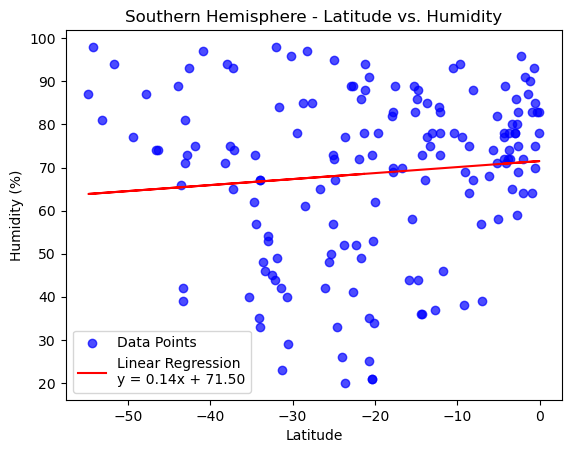

In [38]:
# Humidity vs. Latitude Linear Regression Plot
# Southern Hemisphere

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, filename=None):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.7, label='Data Points')
    plt.plot(x_values, regression_line, color='red', label=f'Linear Regression\ny = {slope:.2f}x + {intercept:.2f}')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    # Add regression equation and r value to the plot
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_value_text = f'r = {r_value:.2f}'
    print(f"The r-value is: {r_value_text}")
    
    if filename:
        plt.savefig(filename)
    
    plt.show()

create_linear_regression_plot(
    southern_hemisphere_df["Lat"],
    southern_hemisphere_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere - Latitude vs. Humidity",
    "Southern_hemisphere_latitude_vs_humidity_regression.png"
)

**Discussion about the linear relationship:** 


The r-value is: r = -0.06


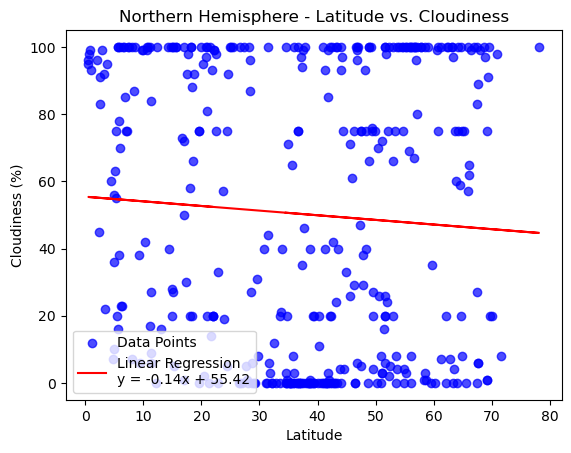

In [39]:
# Cloudiness vs. Latitude Linear Regression Plot
# Northern Hemisphere
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, filename=None):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.7, label='Data Points')
    plt.plot(x_values, regression_line, color='red', label=f'Linear Regression\ny = {slope:.2f}x + {intercept:.2f}')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    # Add regression equation and r value to the plot
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_value_text = f'r = {r_value:.2f}'
    print(f"The r-value is: {r_value_text}")
    
    if filename:
        plt.savefig(filename)
    
    plt.show()

create_linear_regression_plot(
    northern_hemisphere_df["Lat"],
    northern_hemisphere_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere - Latitude vs. Cloudiness",
    "northern_hemisphere_latitude_vs_cloudiness_regression.png"
)

The r-value is: r = 0.03


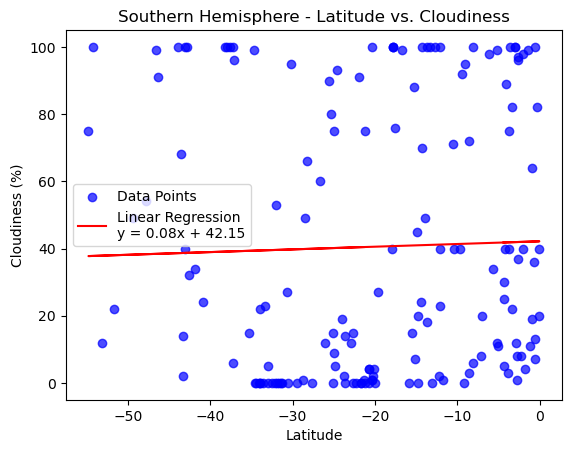

In [40]:
# Cloudiness vs. Latitude Linear Regression Plot
# Southern Hemisphere

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, filename=None):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.7, label='Data Points')
    plt.plot(x_values, regression_line, color='red', label=f'Linear Regression\ny = {slope:.2f}x + {intercept:.2f}')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    # Add regression equation and r value to the plot
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_value_text = f'r = {r_value:.2f}'
    print(f"The r-value is: {r_value_text}")
    
    if filename:
        plt.savefig(filename)
    
    plt.show()

create_linear_regression_plot(
    southern_hemisphere_df["Lat"],
    southern_hemisphere_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Southern Hemisphere - Latitude vs. Cloudiness",
    "Southern_hemisphere_latitude_vs_cloudiness_regression.png"
)

**Discussion about the linear relationship:** 


The r-value is: r = -0.05


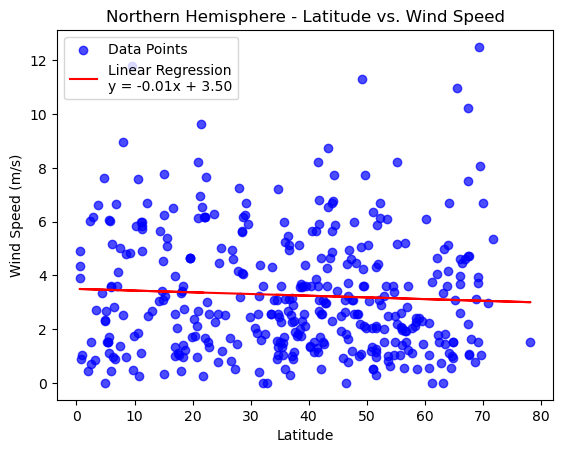

In [41]:
# Wind Speed vs. Latitude Linear Regression Plot
# Northern Hemisphere

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, filename=None):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.7, label='Data Points')
    plt.plot(x_values, regression_line, color='red', label=f'Linear Regression\ny = {slope:.2f}x + {intercept:.2f}')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    # Add regression equation and r value to the plot
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_value_text = f'r = {r_value:.2f}'
    print(f"The r-value is: {r_value_text}")
    
    if filename:
        plt.savefig(filename)
    
    plt.show()
    
create_linear_regression_plot(
    northern_hemisphere_df["Lat"],
    northern_hemisphere_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Northern Hemisphere - Latitude vs. Wind Speed",
    "northern_hemisphere_latitude_vs_wind_speed_regression.png"
)

The r-value is: r = -0.17


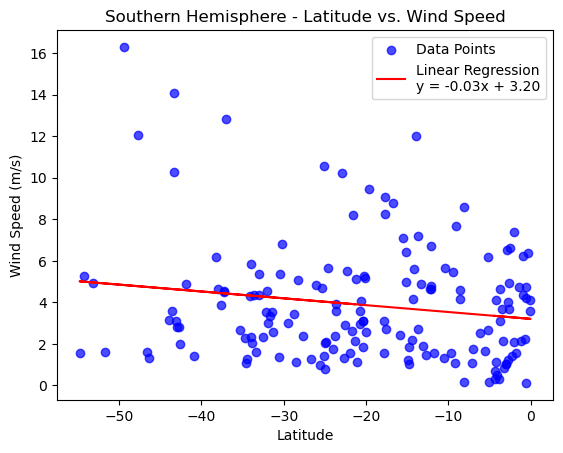

In [42]:
# Wind Speed vs. Latitude Linear Regression Plot
# Southern Hemisphere

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, filename=None):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.7, label='Data Points')
    plt.plot(x_values, regression_line, color='red', label=f'Linear Regression\ny = {slope:.2f}x + {intercept:.2f}')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    # Add regression equation and r value to the plot
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_value_text = f'r = {r_value:.2f}'
    print(f"The r-value is: {r_value_text}")
    
    if filename:
        plt.savefig(filename)
    
    plt.show()
    
create_linear_regression_plot(
    southern_hemisphere_df["Lat"],
    southern_hemisphere_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Southern Hemisphere - Latitude vs. Wind Speed",
    "Southern_hemisphere_latitude_vs_wind_speed_regression.png"
)

**Discussion about the linear relationship**